In [ ]:
# ch12 01.ipynb

### 가상환경

In [ ]:
# conda create -n [이름] python=[버전]
# conda activate [이름]

# conda deactivate
# conda remove-n [이름] --all

# tensorflow 안전지원 파이썬 버젼 3.11 로 가상환경 생성

### 딥러닝 감성분석
- 입력 ~ 1D Convolution + poling 반복 단계 과정정리

In [ ]:
# 딥러닝 감성분석 - 딥러닝에 넣을 데이터 변환 과정 => 정수배열

# 입력 -> 토큰화 및 시퀀스 변화 -> 패딩(고정길이화) -> 임베딩(단어->벡터화)
# -> 1D Convolution + poling 반복 -> Flatten ->  Dense(은닉) -> 출력(softmax, 이진분류)
# -> 학습(Adam + binary_CrossEntropy) -> 검증 / 테스트 평가 -> 시각화 

# 시퀀스 단계에서 문장별로 숫자로 변환한 숫자 리스트의 길이를 맞추는 단계, 패딩
# 임베딩 단계에서 단어별의 관계와 의미를 수치로 표시한다. 벡터화

- 말뭉치 로딩(nltk) 데이터 로딩
- 토큰화(빈고 기반 인덱싱) 텍스트를 숫자로 변환
- 시퀀스 패딩 고정길이 배치 구성
- 임베딩 단어를 dense vector 표현학습
- 임베딩 발전
    - 한계 : 작은 데이터에서는 일반화 부족
    - 발전 : 사전학습(Word2vec) , 문맥적 임베딩(Bert, GPT)

In [ ]:
%pip install tensorflow

In [ ]:
%pip install numpy

In [ ]:
# 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# sample data
texts = [
    'I really love this movie',
    'I hate this boring film',
    'love love great film'
] # texts에 딕셔너리 형태도 들어가던데 그건 뭔지 ^

# 토큰화 객체(최대 단어 10, oov 토큰 지정)
tokenizer = Tokenizer(num_words=10, oov_token='UNK') # ^
# num_words
# 상위 10개의 단어만 사전에 포함한다.

# oov_token
# 모델이 학습할 때 보지 못한 단어를
# 하나의 특별한 토큰으로 치환할때 무엇으로 치환할지 설정

# num_words에 지정된 10의 값은 ovv_token까지 합해서 10개의 단어 사전을 생성한다.
# 그래서 단어인덱스에서 조회한
# 11번째 마지막 항목 'great': 10 은 실제로 단어사전에 해당되지않는다.

tokenizer.fit_on_texts(texts)
print(f'단어 인덱스 : {tokenizer.word_index}')

# 시퀀스로 변환 ^
seqs = tokenizer.texts_to_sequences(texts)
print(f'원본 시퀀스 : {seqs}')

# 패딩(최대길이를 6)
padded = pad_sequences(seqs,maxlen=6,padding='post') # ^
# padding='post'
# padding=pre'
print(f'패딩결과 : {padded}, 사이즈 : {padded.shape}')

In [ ]:
# 임베딩 : 임베딩 레이어
import tensorflow as tf
# 패딩된 시퀀스 padded
vocab_size = 11 # unk 포함 단어인덱스 최대값 + 1
embed_dim = 4 # 작은 차원
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=6)
]) # ^
embeddings = model.predict(padded)
print(f'임베딩 텐서 모양 : {embeddings.shape}') # (3, 6, 4)
print(f'첫 문장 첫 단어 벡터 : {embeddings[0,0,:]}')

# output_dim = 4
# 단어 하나가 [0.12, -0.53, 0.88, 0.03]처럼 4개의 실수로 표현

# output_dim 출력 차원수는 4차원으로 적절히 설정

# 임베딩된 단어 벡터를 시각화 ^
# 단어 간 의미적 유사도 분포 확인

In [ ]:
# 1D Convolution
# 1D Convolution은 "문장 속 특징을 찾는 탐지기",
# Pooling은 "중요한 것만 남기는 압축기",
# 반복하면
# "단어 조합 → 문장 전체 특징"까지 점점 높은 수준의 감정 특징을 뽑을 수 있다.

import numpy as np
import tensorflow as tf
# 임의 시퀀스(배치=1, 길이=6, 임베딩=4)
x= np.random.randn(1,6,4).astype('float32')
conv = tf.keras.layers.Conv1D(
    filters = 2 # 2개의 패턴을 감지
    ,kernel_size = 3 # 3-gram
    ,activation = 'relu' # 활성화 함수 설정
)
# tf.keras.layers.Conv1D(2, 3, activation='relu')
y = conv(x)
print(f'입력 : {x.shape}')
print(f'출력 : {y.shape}')
print(f'출력값 : {y.numpy()}')

# 입력 : (1, 6, 4)
# 출력 : (1, 4, 2)
# kernel_size = 3 으로 6개의 값을 3개씩 차례로 겨치게 묶어서 출력[1]은 4개
# filters = 2로 지정 했으므로 출력[2]은 2개

# 근데 여기서 다른 걸로 사용해서 패턴을 구할수는 없는건지 ^

In [ ]:
# MaxPooling
pool = tf.keras.layers.MaxPooling2D

###

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # 단어를 단어사전, 단어를 숫자로 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences # 길이 맞추기
import numpy as np
import tensorflow as tf

texts = [
    'I really love this movie', # 긍정
    'I hate this boring film', # 부정
    'great love film', # 긍정
    'boring hate film' # 부정
]

labels = np.array([0,1,0,1]) # 긍정 : 0 , 부정 : 1

# 토큰화
tokenizer = Tokenizer(num_words=10,oov_token='UNK')
tokenizer.fit_on_texts(texts) # 단어 사전 생성
# 시퀀스화
seqs = tokenizer.texts_to_sequences(texts)
    # 단어사전을 기반으로 단어들을 숫자로 변경()
# 길이 맞추기
x = pad_sequences(seqs,maxlen=6,truncating='post')

# 임베딩
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 11, output_dim = 8, input_length = 6),
    tf.keras.layers.Conv1D(16,3,activation='relu'), # ^
    # tf.keras.layers.Conv1D(filters, kernel_size, activation=...)
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    # 마지막 출력 설정값에 어울리는 활성화함수를 선정 ^ :
        # 1개 : sigmoid
        # 2개 : softmax
    # ^
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) # ^
# binary_crossentropy
# binary_crossentropy는 정답이 0 또는 1인 이진분류에서 사용되는 손실함수
# 모델이 예측한 확률이 정답(0 or 1)과 얼마나 차이나는지를 계산해 손실값으로 나타낸다.
# 예측이 정답에 가까울수록 손실값은 작아지고,
# 멀수록 커져서 모델이 더 정확해지도록 학습을 유도한다.
# -> 옵티마이저는 손실값이 최소화, 작아지는 쪽으로 가중치를 조절한다.

history = model.fit(x,labels,epochs=15)

In [ ]:
preds = model.predict(x)
print(f"최종훈련 정확도 : {history.history['acc'][-1]}")
print(f'{preds}')
print(f'라벨 : {labels}')

###

In [ ]:
#%pip install nltk

In [40]:
#%pip install scikit-learn

In [49]:
#%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 38.7 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 65.0 MB/s  0:00:00
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fontto

In [ ]:
# nltk 데이터로드
import nltk
nltk.download('mocie_reviews')
from nltk.corpus import movie_reviews

In [ ]:
# 재현성 시드 고정
# 재현성을 위해 랜덤 시드를 고정한다.
# 넘파이, 텐서플로우, 파이썬 기본 random 모듈의 시드를 모두 42로 설정
import random
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [ ]:
# 데이터 로딩
ids = movie_reviews.fileids() # ^
# .fileids()
# NLTK 코퍼스(corpus) 안에 포함된 파일들의
# ID(이름 목록) 을 가져오는 메서드입니다.

# ID를 순환문으로 돌려, 전체 데이터의 행과, 카테고리를 추출한다.
reviews = [movie_reviews.raw(id) for id in ids]
categories = [movie_reviews.categories(id) for id in ids]

In [ ]:
# 하이퍼 파라미터
max_words = 10000 # 최대 단어수
    # 이전버젼에선 max_words가 num_words
maxlen = 500 # 문서길이
embed_dim = 64 # 임베딩 차원
batch_size = 256 # batch_size
epochs = 15 # epochs

# 토큰화 + 시퀀스 변화 + 패딩
tokenizer = Tokenizer(num_words = max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
seqs = tokenizer.texts_to_sequences(reviews)
x = pad_sequences(seqs,maxlen=maxlen,truncating='post') # ^
    # truncating : 자른다.
        # 기본값은 앞을 자른다. 'pre'
    # padding : 채운다.
        # 기본값은 앞을 채운다. 'pre'

# 체이닝 기법으로
# tokenizer.fit_on_texts(reviews).texts_to_sequences(reviews) 이런식으로
# 하려고했지만 이럴려면 그값으로 바로 반환하는 기능이있어야 한다. ^

# 라벨인코딩
label_map = {'pos':0,'neg':1}
y = np.array([label_map.get(c) for c in categories])
# y = np.array([label_map[c[0]] for c in categories]) ^

# train / test 분할
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=42, test_size=0.2)

# 모델구성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words+1,output_dim=embed_dim,input_length=maxlen),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPool1D(), # ^
    tf.keras.layers.Conv1D(256,3,activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D() # ^
    tf.keras.layers.MaxPool1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'), # 이 단계가 있는 이유 ^
    tf.keras.layers.Dense(1,activation='sigmoid') # ^ sigmoid와 softmax
])

# 1)
# 두가지의 풀링툴의 차이 : MaxPool1D 와 GlobalAveragePooling1D
# MaxPool1D: 여러 값 중 가장 큰 값만 뽑아서 중요한 특징만 남긴다.
# GlobalAveragePooling1D: 전체 값을 평균내서 전체적인 흐름이나 대표값을 만든다.
    # 이 경우에는 Flatten이 필요없다.
    
# 차이점:
# MaxPool1D는 강한 특징 강조
# GlobalAveragePooling1D는 전체적인 정보 요약에 쓰인다.

# 2)
# tf.keras.layers.Dense(64,activation='relu'), 이 단계가 있는 이유

# 3)
# 출력층에서의 활성화 함수 선택, sigmoid와 softmax

####
# 컴파일 compile
adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

# 콜백 callbacks (선택)
import tensorflow as tf
es = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 학습 fit
history = model.fit(
    x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2
    #, callbacks=[es]
    ) # ^

# validatioin_split

# callbacks

TypeError: unhashable type: 'list'

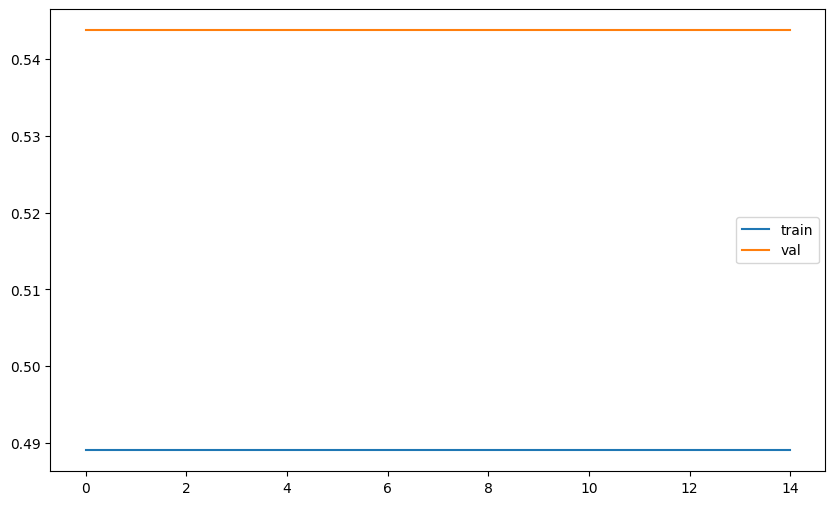

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.5000 - loss: 0.3964
test loss : 0.39642032980918884, test acc : 0.5


In [50]:

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='val')
plt.legend()
plt.show()

# 테스트 평가
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'test loss : {test_loss}, test acc : {test_acc}')

# 임의의 데이터로 예측

In [36]:
# conv1d 배치크기, 시퀀스길이, 채널수
# 배치크기=32, 시퀀스길이=10, 채널수=64
x = tf.random.normal(shape=(32,10,64))

# Flatten
print(tf.keras.layers.Flatten()(x).shape)

# GlobalAveragePooling1D
tf.keras.layers.GlobalAveragePooling1D()(x).shape
    # 각 채널 Feature map 마다 평균

(32, 640)


TensorShape([32, 64])